In [1]:
from __future__ import division, absolute_import, unicode_literals

# Machine Learning Exercises: Week 1, Chapter 6

From https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/tree/master/Session2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Download data:
- http://www.astro.caltech.edu/~mjg/SDSS_gals.csv
- http://www.astro.caltech.edu/~mjg/SDSS_colors.csv

## Kernel Density Estimation

For more info see:
- https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/13045a2123c8d845846fba5ca88673ab887a6509/Session1/Day3/IntroToVisualization.ipynb
- https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/f954d8669c3cfad8676669f4c5640db143b8e606/Session2/Day1/Unsupervised%20machine%20learning.ipynb

**Problem:** Plot the redshift distribution of SDSS galaxies. Try out different binning rules like 'scotts', 'freedman', 'knuth', 'blocks'. Then fit the data with a kde and compare to histograms. (Note: You will have to reshape the redshift data and the kde returns log(density).)

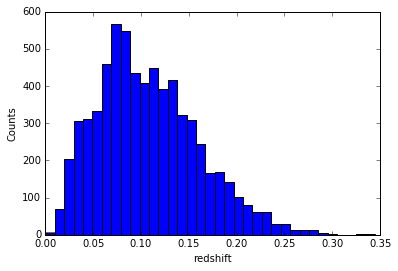

In [8]:
from astroML.plotting import hist

df = pd.read_csv("SDSS_gals.csv")
z = df['z']

hist(z, bins = 'scott') # complete 
plt.xlabel('redshift')
plt.ylabel('Counts')

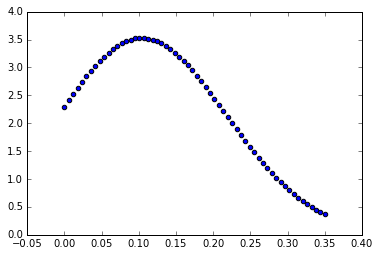

In [16]:
from sklearn.neighbors import KernelDensity

z_kde = z.reshape(-1, 1)

kde = KernelDensity(bandwidth=.1) # complete
 # complete
Xgrid = np.linspace(0,.35,60)
kde.fit(z_kde)
score = kde.score_samples(Xgrid.reshape(-1,1)) # complete
dens = np.exp(score)
plt.figure()
plt.scatter(Xgrid.reshape(-1,1),dens) # complete


**Problem:** Use sklearn's GridSearchCV to optimize the bandwidth parameter.

{u'bandwidth': 0.0071968567300115215}


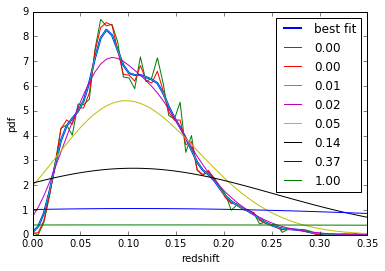

In [29]:
from sklearn.grid_search import GridSearchCV

values = np.logspace(-3,0,8)
# use grid search cross-validation to optimize the bandwidth
kde = KernelDensity(bandwidth=.1)
params = {'bandwidth':values} # complete
grid = GridSearchCV(kde,params) # complete
grid.fit(z_kde)
print grid.best_params_
kde = KernelDensity(bandwidth=grid.best_params_['bandwidth'])
kde.fit(z_kde)
score = kde.score_samples(Xgrid.reshape(-1,1))
dens = np.exp(score)
plt.plot(Xgrid.reshape(-1,1),dens,label='best fit',lw=2)
for value in values:
    kde = KernelDensity(bandwidth=value)
    kde.fit(z_kde)
    score = kde.score_samples(Xgrid.reshape(-1,1))
    dens = np.exp(score)
    plt.plot(Xgrid.reshape(-1,1),dens,label='%1.2f'%value)
plt.legend()
plt.xlabel('redshift')
plt.ylabel('pdf')

Help on class GridSearchCV in module sklearn.grid_search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      A object of that type is instantiated for each grid point.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries


In [ ]:
data = # complete

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': # complete
grid = GridSearchCV( # complete
# complete

x = np.arange(.0, 40, 1)
y = np.arange(-24, -15, 0.2)
X, Y = np.meshgrid(x, y)
XY = np.array([X.flatten(), Y.flatten()]).transpose()
pdf = # complete
             
# Use imshow to make a color density plot
plt.imshow(# complete, interpolation='none', cmap=pl.cm.jet, origin='lower',clip_on=True))

## k-neighbors

For more info see:
- https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/b680396be06ca9085a20e7a3ba12325119b4d6f6/Session2/Day1/ReIntroToMachineLearning.ipynb


**Problem:** Classify the seaborn iris dataset with k-neighbors.

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(iris, vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"],
             hue = "species", diag_kind = 'kde')

**Note:** You can also load the data as a scikit-learn Bunch which enables dictionary-like properties, and easy integration with all the scikit-learn algorithms.

The scikit-learn Bunch consists of several keys, of which we are primarily interested in the data and target information.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
plt.scatter( # complete
plt.xlabel('sepal length')
plt.ylabel('sepal width')

**Problem:** Fit two different $k$NN models to the iris data, one with 3 neighbors and one with 10 neighbors. Plot the resulting class predictions in the sepal length-sepal width plane (same plot as above).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNNclf = KNeighborsClassifier( # complete 
preds = # complete 
plt.figure()
plt.scatter( # complete 

KNNclf = KNeighborsClassifier( # complete 
preds = # complete 
plt.figure()
plt.scatter( # complete

**Problem:** Use cross-validation to obtain accuracies for your kNN models.

In [ ]:
from sklearn.model_selection import cross_val_predict

CVpreds = cross_val_predict(# complete
plt.figure()
plt.scatter( # complete
print("The accuracy of the kNN = 5 model is ~{:.4}".format( # complete

CVpreds50 = cross_val_predict( # complete

print("The accuracy of the kNN = 50 model is ~{:.4}".format( # complete

**Extra:** Try calculating the confusion matrix or ROC curve using sklearn.

## k-means

For more info see:
- https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/f954d8669c3cfad8676669f4c5640db143b8e606/Session2/Day1/Unsupervised%20machine%20learning.ipynb


In [30]:
import pandas as pd

df = pd.read_csv("SDSS_colors.csv")

0     2.331383
1     0.912216
2     1.165695
3     2.153471
4     0.960289
5     1.383686
6     1.160040
7     2.440204
8     0.866938
9     0.932411
10    1.641371
11    1.571652
12    1.386331
13    0.821611
14    0.900442
...
12869    1.094000
12870    1.667965
12871    1.667485
12872    0.948374
12873    1.336656
12874    2.052726
12875    0.980921
12876    0.919330
12877    2.547573
12878    0.803444
12879    1.546808
12880    1.150086
12881    1.140584
12882    1.813750
12883    1.193310
Name: u_g, Length: 12884, dtype: float64


ValueError: incompatible sizes: argument 'height' must be length 4 or scalar

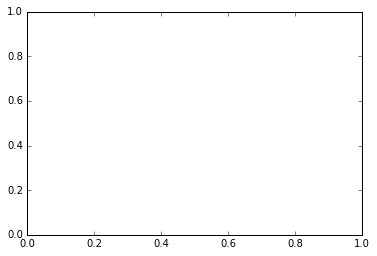

In [35]:
# Plot Data

# Example:
#import seaborn as sns
#sns.set_style('darkgrid')
print df['u_g']
plt.scatter(df['u_g'],)

In [36]:
from sklearn.cluster import KMeans

Kcluster = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
Kcluster.fit(df)
labels = Kcluster.labels_
preds = Kcluster.predict(df)
centers = Kcluster.cluster_centers_

plt.figure(figsize=(4,4))
plt.scatter(df['u_g'], df['g_r'], c=preds, cmap='viridis', edgecolor='none')
plt.plot(centers[:,0], centers[:,1], '^', c='b')
plt.xlabel('u - g')
plt.ylabel('g - r')
        
Kcluster = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
Kcluster.fit(df)
labels = Kcluster.labels_
preds = Kcluster.predict(df)
centers = Kcluster.cluster_centers_

plt.figure(figsize=(4,4))
plt.scatter(df['u_g'], df['g_r'], c=preds, cmap='viridis', edgecolor='none')
plt.plot(centers[:,0], centers[:,1], '^', c='b')
plt.xlabel('u - g')
plt.ylabel('g - r')

plt.show()

TypeError: __init__() got an unexpected keyword argument 'algorithm'

**Problem:** Try two different k-means models - one with 2 clusters, one with 3 clusters. (You can also try varying other parameters like n_init and init.)

In [ ]:
from sklearn.cluster import KMeans

Kcluster = KMeans( # complete
# complete
    
plt.figure()
plt.scatter( # complete
plt.xlabel('u - g')
plt.ylabel('g - r')
        
Kcluster = KMeans( # complete

plt.figure()
plt.scatter( # complete
plt.xlabel('u - g')
plt.ylabel('g - r')

**Note:** k-means uses Eucliden sitance as its similarity metric, so the magnitude of individual features can have a strong effect on the final clustering outcome. This means that rescaling the data is generally a good idea. Check the mean, std, min, max of each parameter to see if one feature is particularly dominant.

**Problem:** Try rescaling the data with the sklearn class StandardScaler().

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit_transform( # complete
    
Kcluster = KMeans( # complete
        
plt.figure()
plt.scatter(# complete
plt.xlabel('u - g')
plt.ylabel('g - r')

**Note:** sklearn has another implementation of k-means, MiniBatchKMeans, which is faster, but less accurate.

**Problem:** To determine the best value of k, try calculating the silhouette score for k values ranging from 2 to 10. The silhouette score is a comparison between the mean intra- and inter-cluster distances. A lower score is better.

In [ ]:
from sklearn import metrics

# Select a random subset of the data
N_small = 100
dfSample = df[ # complete
    
ss = []
nn = [2,3,5,10]
    
for n in # complete
    Kcluster = Kmeans( # complete
    
    ss.append(metrics.silhouette_score( # complete
            
plt.figure()
plt.scatter(# complete
plt.xlabel('k')
plt.ylabel('Mean silhouette')

## Gaussian Mixture Models

For more info see:
- https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/master/Session2/Day2/DSFP2017-EM.pdf

**Problem:** Fit a gaussian mixture model to the rescaled data.

In [ ]:
from sklearn.mixture import GaussianMixture

clf = GaussianMixture(n_components = # complete
clf.fit( # complete
preds = clf.predict( # complete

plt.figure()
plt.scatter( # complete
plt.xlabel('u - g')
plt.ylabel('g - r')

## Hierarchical Clustering

For more info see:
- https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/f954d8669c3cfad8676669f4c5640db143b8e606/Session2/Day1/Unsupervised%20machine%20learning.ipynb

In [ ]:
from sklearn.clustering import AgglomerativeClustering

agg = AgglomerativeClustering( # complete
agg.fit_predict( # complete
                
plt.figure()
plt.scatter( # complete
plt.scatter( # complete
plt.xlabel('u - g')
plt.ylabel('g - r')